# Challenge 4
Series de tiempo

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import math

In [35]:
df = pd.read_csv('series.csv')

In [36]:
df.dtypes

CATEGORY      object
DATE          object
UNITS_SOLD     int64
dtype: object

In [37]:
df['CATEGORY'].value_counts()

CATEG-3    920
CATEG-1    887
CATEG-2    879
Name: CATEGORY, dtype: int64

In [38]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [39]:
df = df.sort_values('DATE')
df = df.set_index('DATE')
# df = df.asfreq('d')

In [42]:
df['CATEGORY'].unique()

array(['CATEG-3', 'CATEG-1', 'CATEG-2'], dtype=object)

In [45]:
df_category3 = df.query('CATEGORY=="CATEG-3"').asfreq('d')
df_category2 = df.query('CATEGORY=="CATEG-2"').asfreq('d')
df_category1 = df.query('CATEGORY=="CATEG-1"').asfreq('d')

In [46]:
df_category3 = df_category3.fillna({'CATEGORY':"CATEG-3",'UNITS_SOLD':0})
df_category2 = df_category2.fillna({'CATEGORY':"CATEG-2",'UNITS_SOLD':0})
df_category1 = df_category1.fillna({'CATEGORY':"CATEG-1",'UNITS_SOLD':0})

<AxesSubplot:xlabel='DATE'>

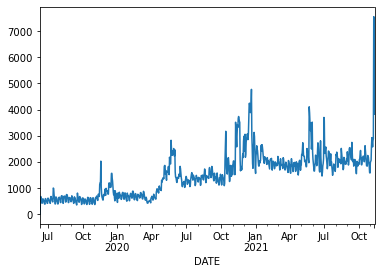

In [80]:
df_category3['2019-06-10'::]['UNITS_SOLD'].plot()

<AxesSubplot:xlabel='DATE'>

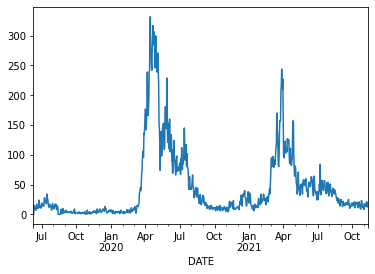

In [81]:
df_category2['2019-06-10'::]['UNITS_SOLD'].plot()

<AxesSubplot:xlabel='DATE'>

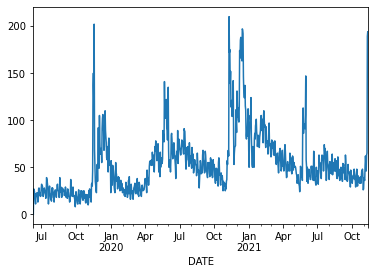

In [86]:
df_category1['2019-06-10'::]['UNITS_SOLD'].plot()

In [87]:
df_category1['2019-06-10'::]

,CATEGORY,UNITS_SOLD
DATE,,
2019-06-10,CATEG-1,0.0
2019-06-11,CATEG-1,27.0
2019-06-12,CATEG-1,26.0
2019-06-13,CATEG-1,24.0
2019-06-14,CATEG-1,18.0
...,...,...
2021-11-08,CATEG-1,63.0
2021-11-09,CATEG-1,65.0
2021-11-10,CATEG-1,189.0


In [88]:
df_category3 = df_category3['2019-06-10'::]
df_category2 = df_category2['2019-06-10'::]
df_category1 = df_category1['2019-06-10'::]

In [91]:
def add_time(df):
    df['time'] = np.arange(len(df.index))
    return df
df_category3 = add_time(df_category3)
df_category2 = add_time(df_category2)
df_category1 = add_time(df_category1)

C:\Users\vitor\AppData\Local\Temp/ipykernel_19452/3192619519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = np.arange(len(df.index))


In [94]:
def add_lag(df, lag):
    df['lag_1'] = df['UNITS_SOLD'].shift(lag)
    return df
df_category3 = add_lag(df_category3,1)
df_category2 = add_lag(df_category2,1)
df_category1 = add_lag(df_category1,1)

C:\Users\vitor\AppData\Local\Temp/ipykernel_19452/3999710790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_1'] = df['UNITS_SOLD'].shift(lag)


In [105]:
df = pd.concat([df_category3, df_category2, df_category1])

In [106]:
df = df.dropna()
df = df.sort_index()

In [107]:
df.head()

,CATEGORY,UNITS_SOLD,time,lag_1
DATE,,,,
2019-06-11,CATEG-3,642.0,1,0.0
2019-06-11,CATEG-2,15.0,1,0.0
2019-06-11,CATEG-1,27.0,1,0.0
2019-06-12,CATEG-3,679.0,2,642.0
2019-06-12,CATEG-2,13.0,2,15.0


In [110]:
df = pd.concat([df.drop('CATEGORY', axis=1), pd.get_dummies(df['CATEGORY'], drop_first=True)], axis=1)


In [111]:
df.head()

,UNITS_SOLD,time,lag_1,CATEG-2,CATEG-3
DATE,,,,,
2019-06-11,642.0,1,0.0,0,1
2019-06-11,15.0,1,0.0,1,0
2019-06-11,27.0,1,0.0,0,0
2019-06-12,679.0,2,642.0,0,1
2019-06-12,13.0,2,15.0,1,0


In [119]:
df.shape[0]

2658

In [120]:
# Train end index for 60% size of dataset
df.shape[0] * 0.6

1594.8

In [124]:
df.iloc[1595].name

Timestamp('2020-11-23 00:00:00')

In [131]:
# Test end index for 20% size of dataset
df[test_end::].shape[0]//2

532

In [132]:
df.iloc[1595+532].name

Timestamp('2021-05-20 00:00:00')

In [144]:
train_start = '2019-06-11'	
validation_start = '2020-11-23'
test_start = '2021-05-20'

In [145]:
train = df[train_start:'2020-11-22']

In [146]:
validation = df[validation_start:'2021-05-19']

In [148]:
test = df[test_start::]

In [171]:
def get_features(df):
    X = df.loc[:, ['time','lag_1','CATEG-2','CATEG-3']]
    y = df.loc[:, 'UNITS_SOLD']  # create the target
    return X, y

In [172]:
from sklearn.linear_model import LinearRegression

X, y = get_features(train)

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [173]:
y_pred = pd.Series(model.predict(X), index=X.index)
print('Train RMSE: ',math.sqrt(mean_squared_error(y, y_pred)))

Train RMSE:  116.92742843076293


In [174]:
X, y = get_features(validation)
y_pred = pd.Series(model.predict(X), index=X.index)
print('Validation RMSE: ',math.sqrt(mean_squared_error(y, y_pred)))

Validation RMSE:  159.96608212679445


In [166]:
y_pred.std()

1005.7273020797028

Considering the standard deviation of UNITS_SOLD are 1005, the RMSE = 159 in the validation set makes it a reasonable good model to predict it with an average error bellow the std deviation.

Below, I going to remove the time feature and see the impact

In [175]:
def get_features(df):
    X = df.loc[:, ['lag_1','CATEG-2','CATEG-3']]
    y = df.loc[:, 'UNITS_SOLD']  # create the target
    return X, y

In [176]:
from sklearn.linear_model import LinearRegression

X, y = get_features(train)

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [177]:
y_pred = pd.Series(model.predict(X), index=X.index)
print('Train RMSE: ',math.sqrt(mean_squared_error(y, y_pred)))

Train RMSE:  117.34572480514143


In [178]:
X, y = get_features(validation)
y_pred = pd.Series(model.predict(X), index=X.index)
print('Validation RMSE: ',math.sqrt(mean_squared_error(y, y_pred)))

Validation RMSE:  160.32305874780747


Without the time feature, the model error increases in the validation and training sets

Below, the RMSE for the test set with the best model

In [180]:
X, y = get_features(test)
y_pred = pd.Series(model.predict(X), index=X.index)
print('Test RMSE: ',math.sqrt(mean_squared_error(y, y_pred)))

Test RMSE:  299.63758818292456
